In [168]:
import numpy as np
import matplotlib.pyplot as plt

report = ''
with open('report.txt', 'r') as f:
    report = f.read().split('\n')

prim_cmp = []
q_set = []
p_set = []
d_set = []
c_set = []

for line in report:
    if line == '':
        continue
    cat = line.split('_')
    prim_cmp += [cat[0]]
    q_set += [cat[1]]
    p_set += [cat[2]]
    d_set += [cat[3]]
    c_set += [cat[4].split(';')[0]]

prim_cmp = list(dict.fromkeys(prim_cmp))
q_set = list(dict.fromkeys(q_set))
p_set = list(dict.fromkeys(p_set))
d_set = list(dict.fromkeys(d_set))
c_set = list(dict.fromkeys(c_set))

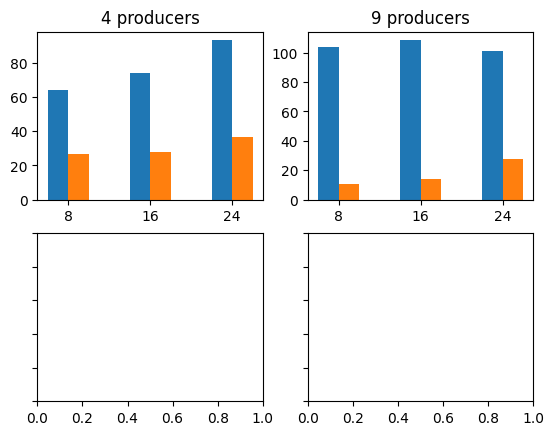

In [209]:
feature_0 = prim_cmp # primary feature   (one bars for each)
feature_1 = p_set    # secondary feature (one horizontal chart for each)
feature_1_label = 'producers' # name of the feature
feature_x = q_set    # tertiary feature  (displayed along the x-axis)

# returns values [y(px_0), y(px_1), ..., y(px_n)] 
# for given p0 and p1 features
def get_values_y(p0, p1, px):
    res = []
    for p in px:
        res += [[x for x in report if p0 in x and p1 in x and p in x]]  
    ys = []
    for r in res:
        tmp = 0
        for line in r:
            tmp += float(line.split(';')[1]) / len(r)
        ys += [tmp]
    return ys

# ax: rect
# cat: categories for bar chart (i.e. ['q8', 'q16', 'q32'])
# ys: bars per category 
def plot_bars(ax, cat, ys):
    width = 0.25
    x = np.arange(len(cat))
    for i in range(len(ys)):
        # 0 1 2  - 
        ax.bar(x + (i - len(ys)/2) * width + width / 2, ys[i], width)
        ax.set_xticks(x, [c[1:] for c in cat])


fig, axs = plt.subplots(2, len(feature_1))
for i in range(0, len(axs[0])):
    axs[0, i].set_title(f'{feature_1[i][1:]} {feature_1_label}')
    for j in range(1, len(axs)):
        axs[j, i].set(yticklabels=[])


for idx, c1 in enumerate(feature_1):
    ys = [get_values_y(_i, c1, px) for _i in p0]
    ax = axs[0, idx]
    plot_bars(ax, px, ys)